In [1]:
import sys
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt

sys.path.append('/content/drive/MyDrive/forward/FF')
from trainer import Trainer

In [2]:
train_set = MNIST('./data/', train=True, download=True)
test_set = MNIST('./data/', train=False, download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 203077797.10it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 20625863.07it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 73789185.35it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 3147807.13it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [12]:
trainer = Trainer(train_set=train_set,
                  ff_dims=[784, 2000, 2000, 2000, 2000],
                  out_dim=10,
                  threshold=10,
                  lr=0.001,
                  batch_size=1000,
                  epochs=100,
                  dropout=0,
                  device='cuda:0')
trainer.train()

Create negative datas


100%|██████████| 60000/60000 [00:29<00:00, 2048.87it/s]


[Start training FF-Layers]
Training 0 ff-layer


100%|██████████| 100/100 [01:03<00:00,  1.57it/s, Loss=0.204]


Training 1 ff-layer


100%|██████████| 100/100 [01:09<00:00,  1.44it/s, Loss=0.135]


Training 2 ff-layer


100%|██████████| 100/100 [01:09<00:00,  1.44it/s, Loss=0.143]


Training 3 ff-layer


100%|██████████| 100/100 [01:09<00:00,  1.43it/s, Loss=0.136]


torch.Size([60000, 6000])
[Start training Softmax-Layer]


100%|██████████| 100/100 [00:59<00:00,  1.68it/s, Loss=0.0184, Acc=0.999]


In [15]:
trainer.test(test_set)

[Test]
test error:  0.03049999475479126


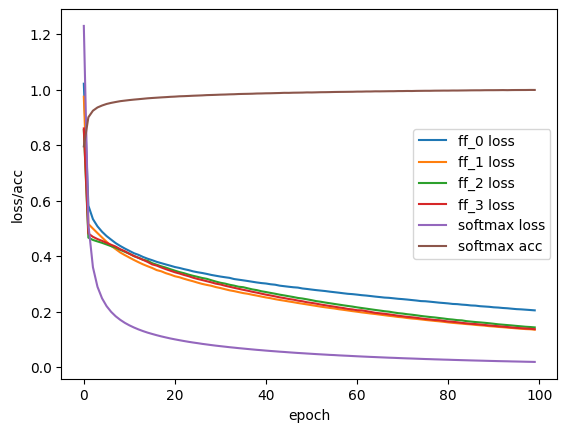

In [16]:
plt.xlabel('epoch')
plt.ylabel('loss/acc')
for i, row in enumerate(trainer.ffnn_his):
  plt.plot(row, label=f'ff_{i} loss')
plt.plot(trainer.softmax_his['loss'], label='softmax loss')
plt.plot(trainer.softmax_his['acc'], label='softmax acc')
plt.legend()